In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [2]:
import numpy as np

In [3]:
import pandas as pd

path = "../data/processed/"

In [4]:
df_train = pd.read_csv(path + "train.csv")
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,label
0,59,43,50,68,98,119,139,145,149,149,...,58,65,59,46,57,104,140,84,72,6
1,154,126,105,102,125,155,172,180,142,111,...,42,67,101,122,133,136,139,142,144,9
2,255,253,253,253,253,253,253,253,253,253,...,83,80,69,66,72,79,83,83,84,9
3,28,37,38,42,44,40,40,24,32,43,...,39,59,42,44,48,38,28,37,46,4
4,170,168,177,183,181,177,181,184,189,189,...,88,85,82,83,79,78,82,78,80,1


In [5]:
X_train = df_train.drop('label', axis=1)
y_train = df_train['label']

In [6]:
df_test = pd.read_csv(path + "test.csv")
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,label
0,158,159,165,166,160,156,162,159,158,159,...,123,145,167,182,175,145,124,129,110,3
1,235,231,232,232,232,232,232,232,232,232,...,117,123,133,141,153,163,178,191,199,8
2,158,158,139,132,166,182,187,193,199,205,...,46,44,44,43,52,37,8,3,7,8
3,155,167,176,190,177,166,168,166,170,179,...,55,70,103,105,72,53,50,52,50,0
4,65,70,48,30,23,40,44,45,45,40,...,127,156,139,131,130,147,136,146,117,6


In [7]:
X_test = df_test.drop('label', axis=1)
y_test = df_test['label']

In [8]:
# Create a log regression
log_reg = LogisticRegression(multi_class="ovr")

log_reg.fit(X_train, y_train)

log_predict = log_reg.predict(X_test)

/home/sprenger/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
print(classification_report(y_test, log_predict))

              precision    recall  f1-score   support

           0       0.42      0.50      0.46      1000
           1       0.46      0.46      0.46      1000
           2       0.33      0.28      0.30      1000
           3       0.28      0.23      0.25      1000
           4       0.36      0.28      0.31      1000
           5       0.32      0.36      0.34      1000
           6       0.42      0.45      0.43      1000
           7       0.45      0.45      0.45      1000
           8       0.46      0.54      0.50      1000
           9       0.42      0.43      0.42      1000

    accuracy                           0.40     10000
   macro avg       0.39      0.40      0.39     10000
weighted avg       0.39      0.40      0.39     10000



In [10]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
conf_mat = confusion_matrix(y_test, log_predict)

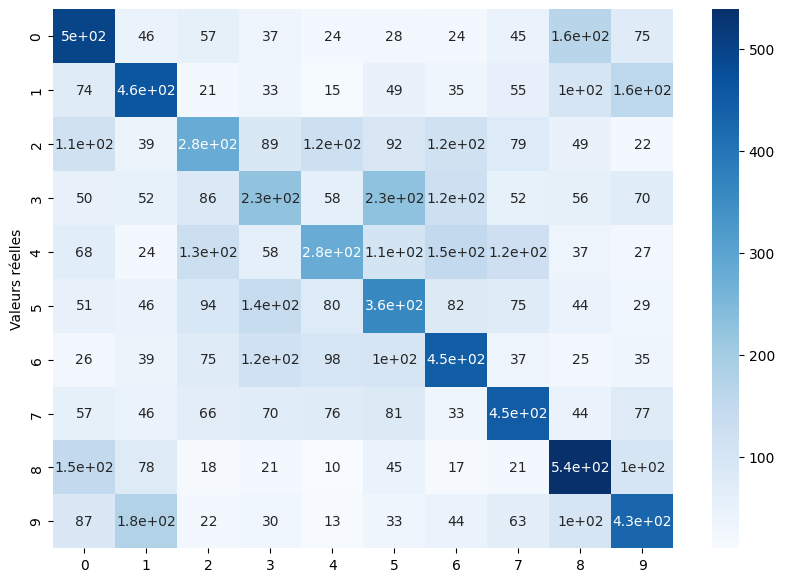

In [12]:
plt.figure(figsize=(10,7))
plt.xlabel('Prédictions')
sns.heatmap(conf_mat, annot=True, cmap='Blues')
plt.ylabel('Valeurs réelles')
plt.show()

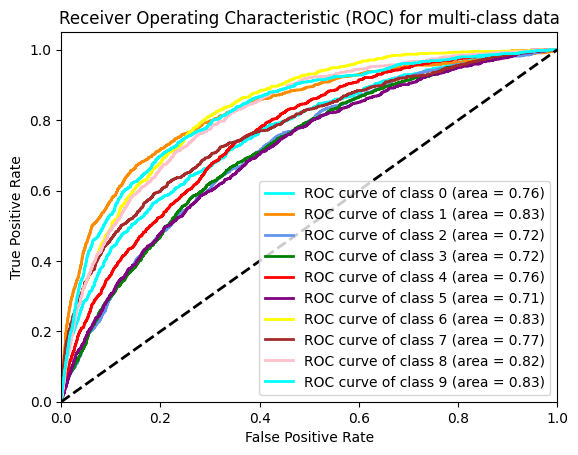

In [15]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Binarize the output
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
n_classes = y_test_bin.shape[1]

# Predict each class vs the rest
y_score = log_reg.decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'yellow', 'brown', 'pink'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for multi-class data')
plt.legend(loc="lower right")
plt.show()